In [49]:
%gui tk
%matplotlib notebook

In [50]:
IMG_PATH = "data/baseball/ball_frame_0.jpg"
IMG_PATH_2 = "data/baseball/strike_frame_0.jpg"

# Annotate points

<IPython.core.display.Javascript object>


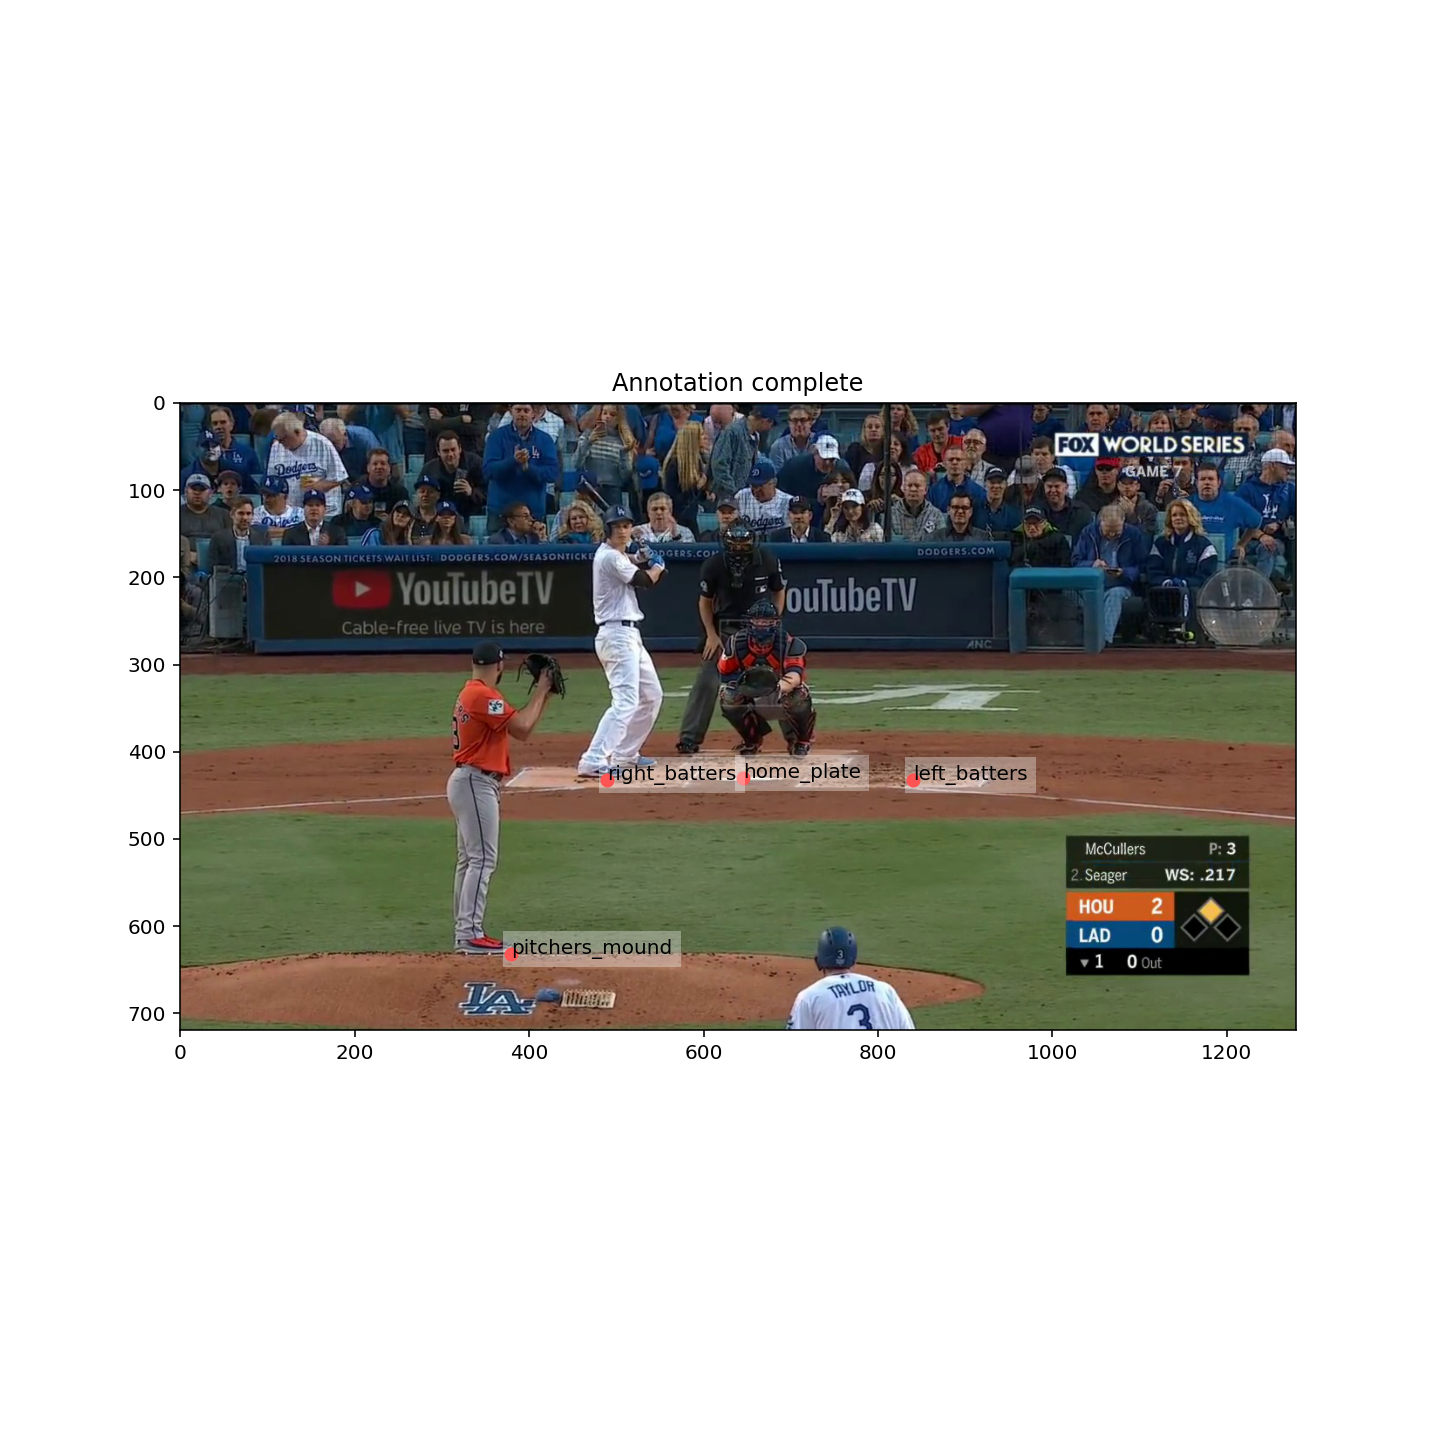

In [51]:
from annotator import MatplotlibAnnotator
import matplotlib.pyplot as plt

x = MatplotlibAnnotator()

img = plt.imread(IMG_PATH)

x.plot_annotate(img, ["home_plate", "left_batters", "right_batters", "pitchers_mound"])


In [52]:
import numpy as np
from templates import TEMPLATES

annotations = x.get_annotations()

objpoints = np.array([TEMPLATES["baseball"]["home_plate"], 
                      TEMPLATES["baseball"]["right_batters"],
                      TEMPLATES["baseball"]["left_batters"],
                      TEMPLATES["baseball"]["pitchers_mound"]])

imgpoints = np.array([annotations["home_plate"],
                      annotations["right_batters"],
                      annotations["left_batters"],
                      annotations["pitchers_mound"]])

# Reshape
objpoints = objpoints.reshape(1,-1, 3).astype('float32')
imgpoints = imgpoints.reshape(1,-1, 2).astype('float32')

# Calibration

In [53]:
import cv2
np.set_printoptions(suppress=True)

img = cv2.imread(IMG_PATH)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:2], None, None) # )

mtx

array([[ 37.47092662,   0.        , 359.49999546],
       [  0.        ,   9.23792073, 639.50000463],
       [  0.        ,   0.        ,   1.        ]])

# Test on new image

<IPython.core.display.Javascript object>


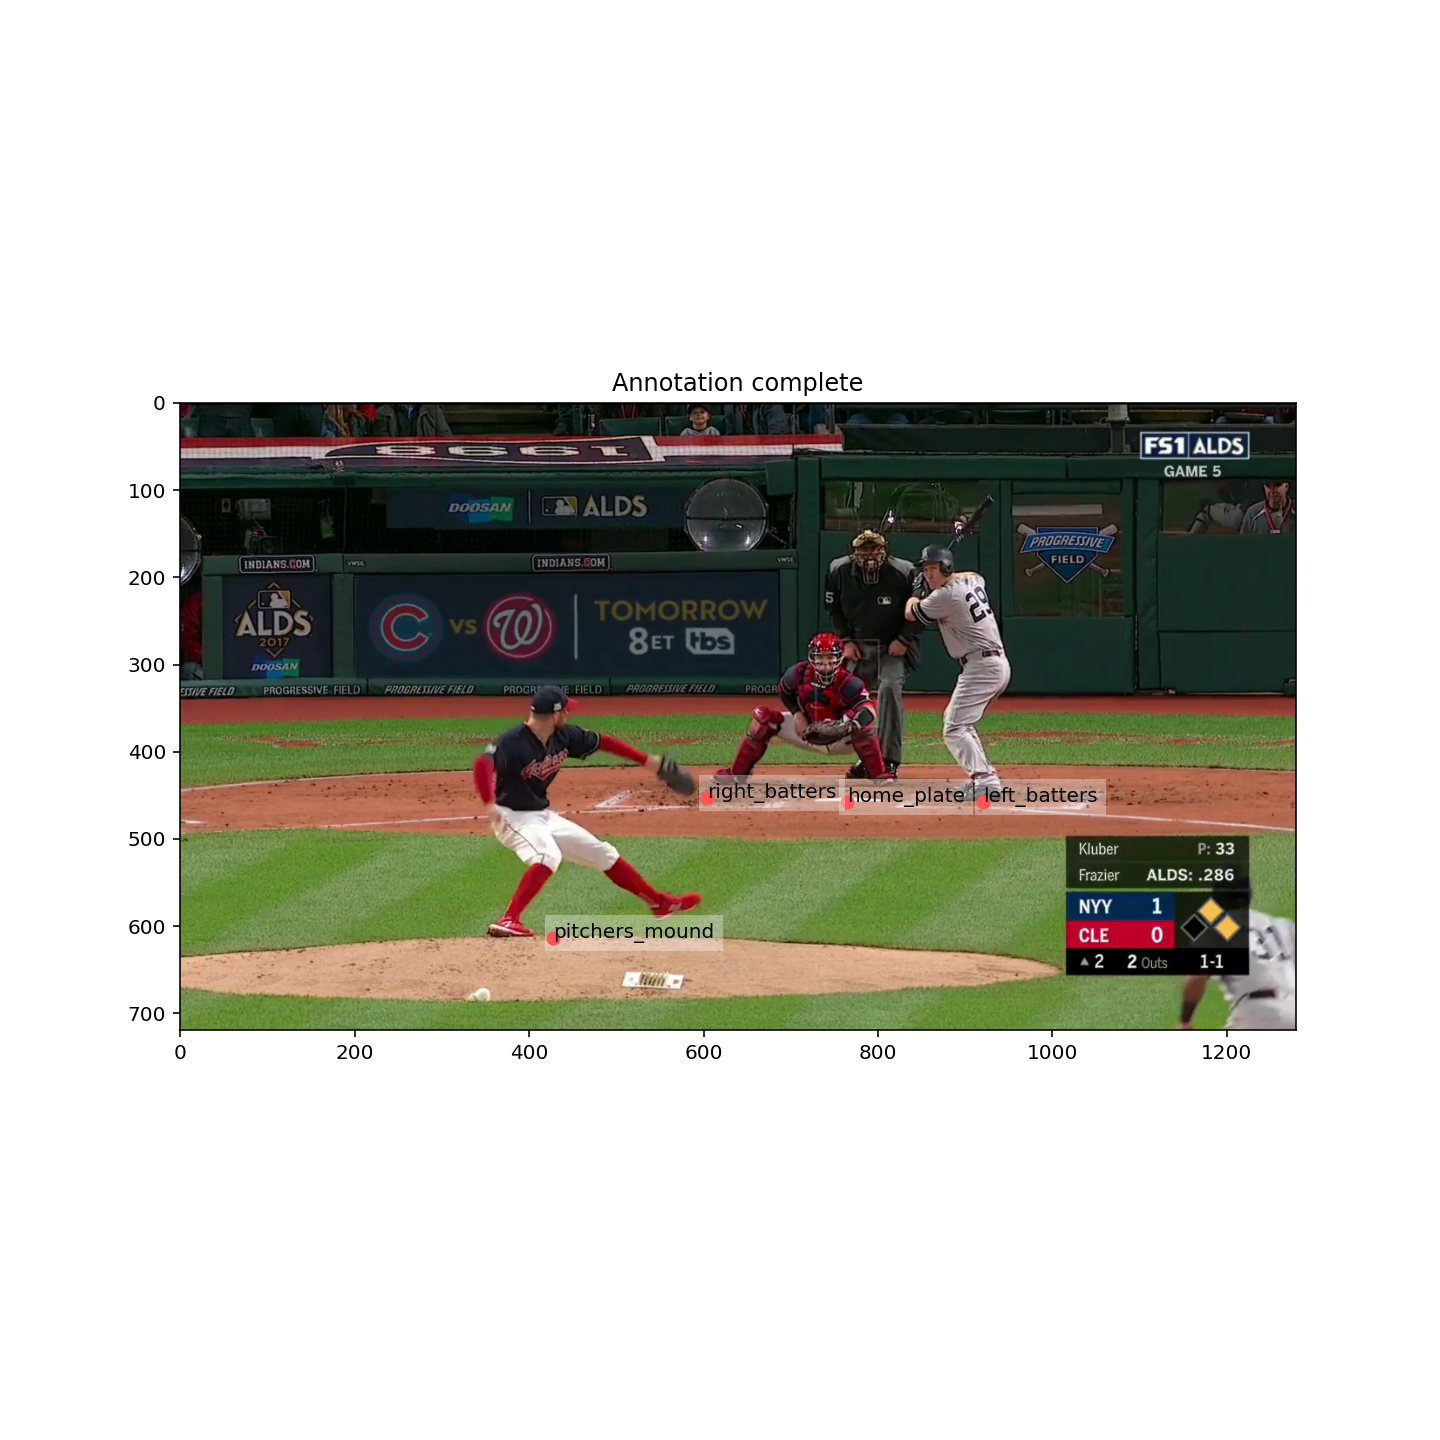

In [54]:
y = MatplotlibAnnotator()

img_2 = plt.imread(IMG_PATH_2)

y.plot_annotate(img_2, ["home_plate", "left_batters", "right_batters", "pitchers_mound"])

In [55]:
annotations_2 = y.get_annotations()

objpoints_2 = np.array([TEMPLATES["baseball"]["home_plate"], 
                      TEMPLATES["baseball"]["right_batters"],
                      TEMPLATES["baseball"]["left_batters"],
                      TEMPLATES["baseball"]["pitchers_mound"]])

imgpoints_2 = np.array([annotations_2["home_plate"],
                      annotations_2["right_batters"],
                      annotations_2["left_batters"],
                      annotations_2["pitchers_mound"]])

# Reshape
objpoints_2 = objpoints_2.reshape(1,-1, 3).astype('float32')
imgpoints_2 = imgpoints_2.reshape(1,-1, 2).astype('float32')

In [56]:
img_2 = cv2.imread(IMG_PATH_2)

ret_2, mtx_2, dist_2, rvecs_2, tvecs_2 = cv2.calibrateCamera(objpoints_2, imgpoints_2, img_2.shape[:2], None, None)

mtx_2

array([[959.79227478,   0.        , 359.49960959],
       [  0.        ,  25.89190353, 639.4862611 ],
       [  0.        ,   0.        ,   1.        ]])

In [57]:
mtx

array([[ 37.47092662,   0.        , 359.49999546],
       [  0.        ,   9.23792073, 639.50000463],
       [  0.        ,   0.        ,   1.        ]])